## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Import dataset

In [2]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
df.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing Thompson Sampling Algorithm

In [4]:
import random

In [45]:
N = 500
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward

## Visualising the results

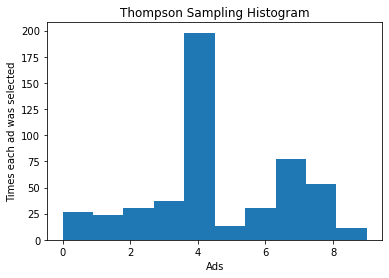

In [46]:
plt.hist(ads_selected)
plt.title('Thompson Sampling Histogram')
plt.xlabel('Ads')
plt.ylabel('Times each ad was selected')
plt.show()